# New Experiments using the Lower / upper bounds

What kind of question would we like to answer ... 

 - What is the maximum and minimum error we get from the first lower bound compared with the final latency ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
toIntList = lambda x: [int(y) for y in x.strip("[]").split(",")]
df = pd.read_csv("automotive.test.log", sep=";",
                 converters={
                     "ExpansionVertex": toIntList,
                     "ExpansionEdges": toIntList,
                     "LowerBounds": toIntList,
                     "UpperBounds": toIntList,
                 }
                )


df.LowerBounds = df.apply(lambda x :  [y/x.AgeLatency for y in x.LowerBounds]  , axis = 1)
df.UpperBounds = df.apply(lambda x :  [y/x.AgeLatency for y in x.UpperBounds]  , axis = 1)
df.ExpansionVertex = df.apply(lambda x :  [y/(x.sum_n+2) for y in x.ExpansionVertex]  , axis = 1)

assert(df.ExpansionVertex.apply(max).max())
assert(df.LowerBounds.apply(max).max())
assert(df.UpperBounds.apply(max).max())

df["BoundsDistances"] = df.apply(lambda x : [abs( l - r ) for (l,r) in zip(x.LowerBounds,x.UpperBounds)], axis=1)

##  What is the maximum and minimum error we get from the first lower bound compared with the final latency ?

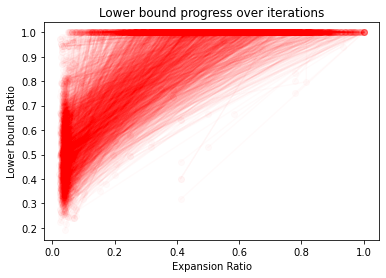

In [20]:
import matplotlib.pyplot as plt

for (x,y) in list(df.apply(lambda x :  (x.ExpansionVertex, x.LowerBounds)  , axis = 1)) :
    plt.plot(x,y, marker="o", color = "r", alpha = 0.02)
_ = plt.xlabel("Expansion Ratio")
_ = plt.ylabel("Lower bound Ratio")
_ = plt.title("Lower bound progress over iterations")

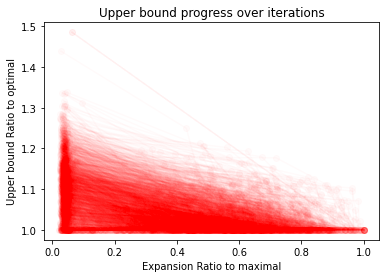

In [21]:
for (x,y) in list(df.apply(lambda x :  (x.ExpansionVertex, x.UpperBounds)  , axis = 1)) :
    plt.plot(x,y, marker="o", color = "r", alpha = 0.02)
_ = plt.xlabel("Expansion Ratio to maximal")
_ = plt.ylabel("Upper bound Ratio to optimal")
_ = plt.title("Upper bound progress over iterations")

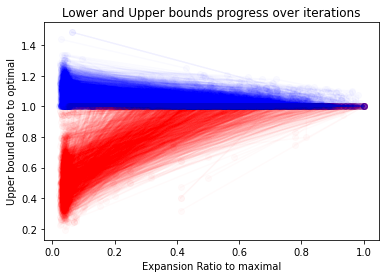

In [22]:
for (x,y) in list(df.apply(lambda x :  (x.ExpansionVertex, x.LowerBounds)  , axis = 1)) :
    plt.plot(x,y, marker="o", color = "r", alpha = 0.02)
_ = plt.xlabel("Expansion Ratio")
_ = plt.ylabel("Lower bound Ratio")
for (x,y) in list(df.apply(lambda x :  (x.ExpansionVertex, x.UpperBounds)  , axis = 1)) :
    plt.plot(x,y, marker="o", color = "b", alpha = 0.02)
_ = plt.xlabel("Expansion Ratio to maximal")
_ = plt.ylabel("Upper bound Ratio to optimal")
_ = plt.title("Lower and Upper bounds progress over iterations")

In [ ]:
print(df.columns)
print(df.IterationCount.max())

## Shallow study of the data

In [ ]:
['kind', 'n', 'm', 'sum_n', 'AgeLatency', 'IterationCount',
       'ExpansionVertex', 'ExpansionEdges', 'LowerBounds', 'UpperBounds',
       'gen_time', 'sp_time', 'BoundsDistances']

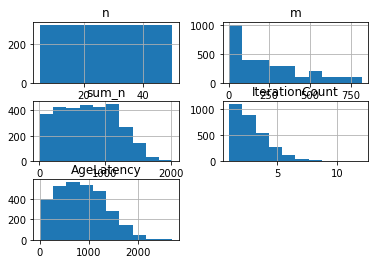

In [64]:
_ = df[[ "n","m",  "sum_n", "IterationCount","AgeLatency"]].hist()
## sum_n is the complexity as the sum of Ni 

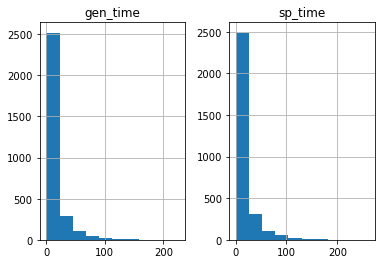

In [58]:
_ = df[["gen_time", "sp_time"]].hist()

## Study of the bounds

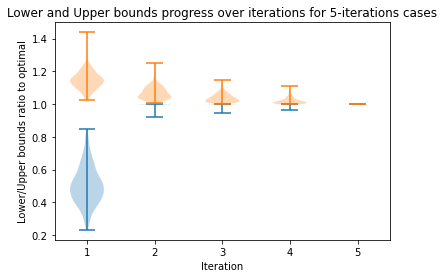

In [24]:
def plotBoundsByIteration(df, itercount) :
    sdf  =  df[df.IterationCount == itercount]
    _ = plt.violinplot(pd.DataFrame(sdf.LowerBounds.to_list(), columns=range(itercount)))
    _ = plt.violinplot(pd.DataFrame(sdf.UpperBounds.to_list(), columns=range(itercount)))
    _ = plt.xlabel("Iteration")
    _ = plt.ylabel("Lower/Upper bounds ratio to optimal")
    
plotBoundsByIteration(df, 5)
_ = plt.title("Lower and Upper bounds progress over iterations for 5-iterations cases")

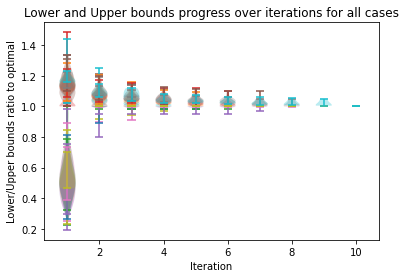

In [25]:
for it in range(1,df.IterationCount.max() + 1) :
    if len(df[df.IterationCount == it]) > 1:
        plotBoundsByIteration(df, it)
_ = plt.title("Lower and Upper bounds progress over iterations for all cases")

In [26]:
def plotBounds(df) :
    sdf = df.copy()
    sdf.LowerBounds = sdf.apply (lambda x : x.LowerBounds + (df.IterationCount.max() - x.IterationCount)*x.LowerBounds[-1:], axis = 1)
    sdf.UpperBounds = sdf.apply (lambda x : x.UpperBounds + (df.IterationCount.max() - x.IterationCount)*x.UpperBounds[-1:], axis = 1)
    _ = plt.violinplot(pd.DataFrame(sdf.LowerBounds.to_list(), columns=range(df.IterationCount.max())))
    _ = plt.violinplot(pd.DataFrame(sdf.UpperBounds.to_list(), columns=range(df.IterationCount.max())))
    _ = plt.xlabel("Iteration")
    _ = plt.ylabel("Lower/Upper bounds ratio to optimal")
    _ = plt.title("Lower and Upper bounds progress over iterations for all cases")

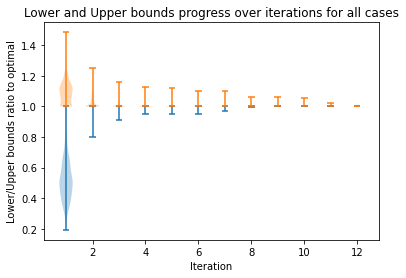

In [27]:
plotBounds(df) 

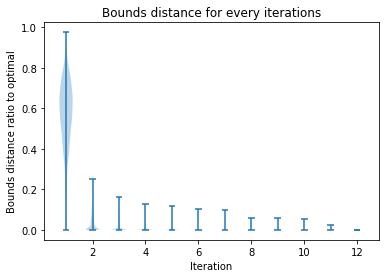

In [28]:
def plotBoundsDistances(df) :
    sdf = df.copy()
    sdf.BoundsDistances = sdf.apply (lambda x : x.BoundsDistances + (df.IterationCount.max() - x.IterationCount)*x.BoundsDistances[-1:], axis = 1)
    _ = plt.violinplot(pd.DataFrame(sdf.BoundsDistances.to_list(), columns=range(df.IterationCount.max())))
    _ = plt.title("Bounds distance for every iterations")
    _ = plt.xlabel("Iteration")
    _ = plt.ylabel("Bounds distance ratio to optimal")
plotBoundsDistances(df)

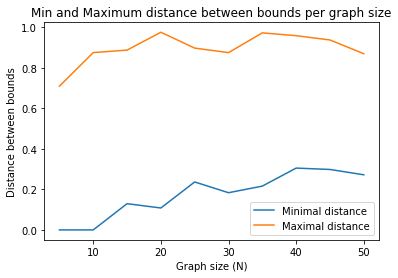

In [60]:
sdf = df.copy()
sdf.BoundsDistances = sdf.apply (lambda x : x.BoundsDistances + (df.IterationCount.max() - x.IterationCount)*x.BoundsDistances[-1:], axis = 1)
sdf["BoundsDistancesMax"] = sdf.BoundsDistances.apply(lambda x : max(x))

x = sdf.groupby("n").max().reset_index()["n"]
y1 = sdf.groupby("n").min().reset_index()["BoundsDistancesMax"]
y2 = sdf.groupby("n").max().reset_index()["BoundsDistancesMax"]

_ = plt.plot(x,y1, label = "Minimal distance")
_ = plt.plot(x,y2, label = "Maximal distance")
_ = plt.title("Min and Maximum distance between bounds per graph size")
_ = plt.xlabel("Graph size (N)")
_ = plt.ylabel("Distance between bounds")
_ = plt.legend()